### Here is an example notebook on a dense neural network in keras

So let us start by importing some packages

In [253]:
#%matplotlib inline

import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

In [254]:
df_train = pd.read_csv("training.zip", compression='zip')

df_train.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [255]:
df_train_signal = df_train[df_train.Label == 's']
df_train_background = df_train[df_train.Label == 'b']
#verify with the head option

In [256]:
s_DER_mass_transverse_met_lep = df_train_signal["DER_mass_transverse_met_lep"].to_numpy()
b_DER_mass_transverse_met_lep = df_train_background["DER_mass_transverse_met_lep"].to_numpy()

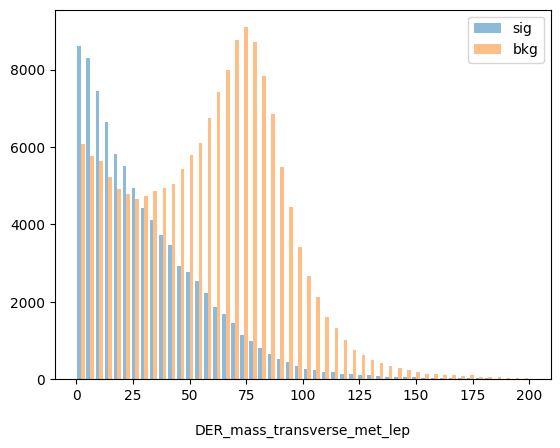

In [257]:
plt.hist([s_DER_mass_transverse_met_lep, b_DER_mass_transverse_met_lep], bins=50, range=[0,200], alpha=0.5, label=['sig', 'bkg'])
plt.xlabel('DER_mass_transverse_met_lep', labelpad=15)
plt.legend(loc='upper right')

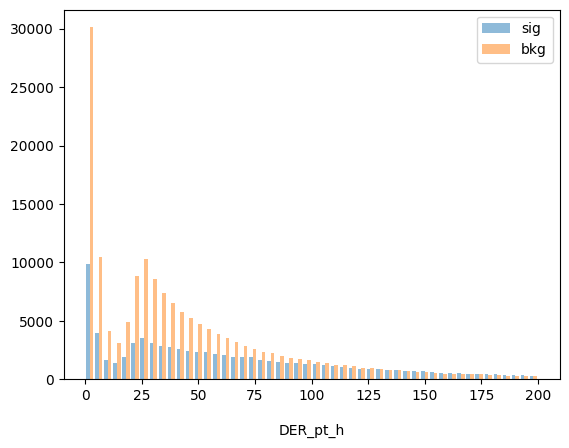

In [258]:
s_DER_pt_h = df_train_signal["DER_pt_h"].to_numpy()
b_DER_pt_h = df_train_background["DER_pt_h"].to_numpy()
plt.hist([s_DER_pt_h, b_DER_pt_h], bins=50, range=[0,200], alpha=0.5, label=['sig', 'bkg'])
plt.xlabel('DER_pt_h', labelpad=15)
plt.legend(loc='upper right')

In [259]:
df_train = df_train.replace({'Label': {'s': 1, 'b': 0}})
X_train = np.array(df_train.drop(['EventId', 'Label', 'Weight'], 1).astype(float))
Y_train = np.array(df_train['Label'])
Weights = np.array(df_train['Weight'])

<ipython-input-259-2e2b13ecb5cc>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = np.array(df_train.drop(['EventId', 'Label', 'Weight'], 1).astype(float))


In [260]:
Weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [261]:
Weights[Y_train==0] *= 200000/Weights[Y_train==0].sum()
Weights[Y_train==1] *= 200000/Weights[Y_train==1].sum()

In [262]:
Weights

array([0.76686561, 1.08690283, 1.14228215, ..., 5.38624956, 0.81830271,
       0.9136129 ])

Now lets split our Inputs and labels randomly training and testing data

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
x_train,x_test, y_train,y_test, w_train, w_test = train_test_split(X_train, Y_train, Weights,
                                                  test_size=0.20, random_state=45)

In [265]:
len(x_train)

200000

In [266]:
len(y_train)

200000

In [267]:
len(w_train)

200000

In [268]:
import numpy as np
np.random.seed(1234)
import os
#os.environ["KERAS_BACKEND"] = "tensorflow"
import subprocess
import pickle
#from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [269]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN


In [270]:

input_shape = x_train.shape[1]
dropoutRate = 0.1

we will now train two seperate models , one shallow and one dense and compare the performance of the two

In [271]:
####
inputArray = Input(shape=(input_shape,))
#
x = Dense(100, activation='relu')(inputArray)
#
output = Dense(1, activation='sigmoid')(x)
####
model_shallow = Model(inputs=inputArray, outputs=output)

In [272]:
model_shallow.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_23 (Dense)            (None, 100)               3100      
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [273]:
model_shallow.compile( loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [274]:
####
inputArray = Input(shape=(input_shape,))
#
x = Dense(100, activation='relu')(inputArray)
x = Dropout(dropoutRate)(x)
#
x = Dense(100)(x)
x = Activation('relu')(x)
x = Dropout(dropoutRate)(x)
#
x = Dense(64, activation='relu')(x)
x = Dropout(dropoutRate)(x)
#
x = Dense(32, activation='relu')(x)
#
output = Dense(1, activation='sigmoid')(x)
####
model_deep = Model(inputs=inputArray, outputs=output)

In [275]:
model_deep.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_25 (Dense)            (None, 100)               3100      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                6464

In [276]:

model_deep.compile( loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [277]:
preprocessing_input = StandardScaler()

In [278]:
preprocessing_input = StandardScaler()
preprocessing_input.fit(X_train)
pickle.dump(preprocessing_input, open("HIGGS_preprocessing.pickle", "wb"))


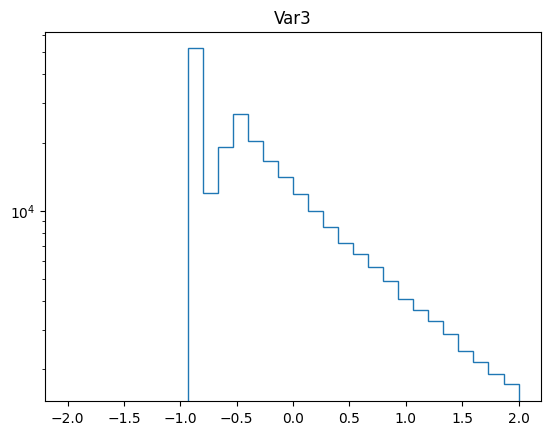

In [279]:
preprocessed_input  = preprocessing_input.transform(X_train)
plt.hist(preprocessed_input[:,3],bins=30,range=(-2,2),histtype='step')
plt.yscale('log')
plt.title('Var3')
plt.show()

In [280]:
class_weights = {0:len(Y_train)/(Y_train==0).sum(),
                 1:len(Y_train)/(Y_train==1).sum()
                 }

In [281]:
class_weights

{0: 1.521301260245964, 1: 2.9182765825813908}

In [282]:
from keras import callbacks

In [283]:
Xt_train = preprocessing_input.transform(x_train)
Xt_test =preprocessing_input.transform(x_test)

In [284]:
early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
model_check_point = callbacks.ModelCheckpoint("model_shallow.h5", monitor = 'val_loss', verbose=True,
                                              save_best_only=True, mode='min')


print("Train now the shallow model ")

history_s = model_shallow.fit(
                Xt_train,
                y_train,
                sample_weight=w_train,
                batch_size=1024,
                epochs=30,
                validation_split=0.2,
                callbacks=[early_stopper, model_check_point])

Train now the shallow model 
Epoch 1/30
150/157 [===========================>..] - ETA: 0s - loss: 0.7352 - accuracy: 0.6681


Epoch 1: val_loss improved from inf to 0.64709, saving model to model_shallow.h5
157/157 [==============================] - 2s 8ms/step - loss: 0.7317 - accuracy: 0.6692 - val_loss: 0.6471 - val_accuracy: 0.6991
Epoch 2/30
 22/157 [===>..........................] - ETA: 0s - loss: 0.6268 - accuracy: 0.7043

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


153/157 [============================>.] - ETA: 0s - loss: 0.6036 - accuracy: 0.7179


Epoch 2: val_loss improved from 0.64709 to 0.59175, saving model to model_shallow.h5
157/157 [==============================] - 1s 7ms/step - loss: 0.6029 - accuracy: 0.7181 - val_loss: 0.5917 - val_accuracy: 0.7279
Epoch 3/30
157/157 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7386


Epoch 3: val_loss improved from 0.59175 to 0.57420, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5698 - accuracy: 0.7386 - val_loss: 0.5742 - val_accuracy: 0.7449
Epoch 4/30
156/157 [============================>.] - ETA: 0s - loss: 0.5582 - accuracy: 0.7468


Epoch 4: val_loss improved from 0.57420 to 0.56468, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5581 - accuracy: 0.7468 - val_loss: 0.5647 - val_accuracy: 0.7469
Epoch 5/30
144/157 [==========================>...] - ETA: 0s - loss: 0.5520 - accuracy: 0.7495


Epoch 5: val_loss improved from 0.56468 to 0.55986, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5517 - accuracy: 0.7501 - val_loss: 0.5599 - val_accuracy: 0.7545
Epoch 6/30
149/157 [===========================>..] - ETA: 0s - loss: 0.5495 - accuracy: 0.7539


Epoch 6: val_loss improved from 0.55986 to 0.55791, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5488 - accuracy: 0.7537 - val_loss: 0.5579 - val_accuracy: 0.7482
Epoch 7/30
144/157 [==========================>...] - ETA: 0s - loss: 0.5470 - accuracy: 0.7540


Epoch 7: val_loss improved from 0.55791 to 0.55532, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5455 - accuracy: 0.7544 - val_loss: 0.5553 - val_accuracy: 0.7550
Epoch 8/30
154/157 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7574


Epoch 8: val_loss improved from 0.55532 to 0.55241, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5432 - accuracy: 0.7574 - val_loss: 0.5524 - val_accuracy: 0.7537
Epoch 9/30
153/157 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7585


Epoch 9: val_loss did not improve from 0.55241
157/157 [==============================] - 1s 5ms/step - loss: 0.5418 - accuracy: 0.7584 - val_loss: 0.5546 - val_accuracy: 0.7520
Epoch 10/30
143/157 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7584


Epoch 10: val_loss improved from 0.55241 to 0.55042, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5403 - accuracy: 0.7583 - val_loss: 0.5504 - val_accuracy: 0.7622
Epoch 11/30
149/157 [===========================>..] - ETA: 0s - loss: 0.5388 - accuracy: 0.7603


Epoch 11: val_loss improved from 0.55042 to 0.54917, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5394 - accuracy: 0.7598 - val_loss: 0.5492 - val_accuracy: 0.7554
Epoch 12/30
156/157 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7607


Epoch 12: val_loss improved from 0.54917 to 0.54829, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5382 - accuracy: 0.7607 - val_loss: 0.5483 - val_accuracy: 0.7569
Epoch 13/30
144/157 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7621


Epoch 13: val_loss improved from 0.54829 to 0.54734, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5366 - accuracy: 0.7617 - val_loss: 0.5473 - val_accuracy: 0.7619
Epoch 14/30
144/157 [==========================>...] - ETA: 0s - loss: 0.5355 - accuracy: 0.7625


Epoch 14: val_loss improved from 0.54734 to 0.54635, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5362 - accuracy: 0.7622 - val_loss: 0.5464 - val_accuracy: 0.7612
Epoch 15/30
146/157 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7631


Epoch 15: val_loss did not improve from 0.54635
157/157 [==============================] - 1s 4ms/step - loss: 0.5356 - accuracy: 0.7633 - val_loss: 0.5500 - val_accuracy: 0.7582
Epoch 16/30
157/157 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.7640


Epoch 16: val_loss did not improve from 0.54635
157/157 [==============================] - 1s 4ms/step - loss: 0.5341 - accuracy: 0.7640 - val_loss: 0.5465 - val_accuracy: 0.7556
Epoch 17/30
151/157 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7642


Epoch 17: val_loss improved from 0.54635 to 0.54362, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5335 - accuracy: 0.7642 - val_loss: 0.5436 - val_accuracy: 0.7594
Epoch 18/30
153/157 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7642


Epoch 18: val_loss did not improve from 0.54362
157/157 [==============================] - 1s 7ms/step - loss: 0.5325 - accuracy: 0.7643 - val_loss: 0.5436 - val_accuracy: 0.7620
Epoch 19/30
153/157 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7662


Epoch 19: val_loss improved from 0.54362 to 0.54245, saving model to model_shallow.h5
157/157 [==============================] - 1s 7ms/step - loss: 0.5316 - accuracy: 0.7662 - val_loss: 0.5424 - val_accuracy: 0.7643
Epoch 20/30
145/157 [==========================>...] - ETA: 0s - loss: 0.5302 - accuracy: 0.7654


Epoch 20: val_loss did not improve from 0.54245
157/157 [==============================] - 1s 4ms/step - loss: 0.5306 - accuracy: 0.7660 - val_loss: 0.5435 - val_accuracy: 0.7676
Epoch 21/30
144/157 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7656


Epoch 21: val_loss improved from 0.54245 to 0.54216, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5303 - accuracy: 0.7660 - val_loss: 0.5422 - val_accuracy: 0.7647
Epoch 22/30
156/157 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7668


Epoch 22: val_loss improved from 0.54216 to 0.54168, saving model to model_shallow.h5
157/157 [==============================] - 1s 5ms/step - loss: 0.5299 - accuracy: 0.7668 - val_loss: 0.5417 - val_accuracy: 0.7629
Epoch 23/30
147/157 [===========================>..] - ETA: 0s - loss: 0.5298 - accuracy: 0.7664


Epoch 23: val_loss improved from 0.54168 to 0.54158, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5293 - accuracy: 0.7666 - val_loss: 0.5416 - val_accuracy: 0.7695
Epoch 24/30
149/157 [===========================>..] - ETA: 0s - loss: 0.5280 - accuracy: 0.7670


Epoch 24: val_loss improved from 0.54158 to 0.53983, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5282 - accuracy: 0.7672 - val_loss: 0.5398 - val_accuracy: 0.7731
Epoch 25/30
152/157 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7686


Epoch 25: val_loss improved from 0.53983 to 0.53907, saving model to model_shallow.h5
157/157 [==============================] - 1s 4ms/step - loss: 0.5276 - accuracy: 0.7685 - val_loss: 0.5391 - val_accuracy: 0.7656
Epoch 26/30
152/157 [============================>.] - ETA: 0s - loss: 0.5266 - accuracy: 0.7691


Epoch 26: val_loss did not improve from 0.53907
157/157 [==============================] - 1s 5ms/step - loss: 0.5265 - accuracy: 0.7690 - val_loss: 0.5397 - val_accuracy: 0.7625
Epoch 27/30
153/157 [============================>.] - ETA: 0s - loss: 0.5263 - accuracy: 0.7690


Epoch 27: val_loss did not improve from 0.53907
157/157 [==============================] - 1s 5ms/step - loss: 0.5264 - accuracy: 0.7689 - val_loss: 0.5392 - val_accuracy: 0.7720
Epoch 28/30
154/157 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.7690


Epoch 28: val_loss did not improve from 0.53907
157/157 [==============================] - 1s 5ms/step - loss: 0.5261 - accuracy: 0.7689 - val_loss: 0.5413 - val_accuracy: 0.7661
Epoch 29/30
156/157 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7697


Epoch 29: val_loss did not improve from 0.53907
157/157 [==============================] - 1s 4ms/step - loss: 0.5257 - accuracy: 0.7697 - val_loss: 0.5418 - val_accuracy: 0.7692
Epoch 30/30
153/157 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7698


Epoch 30: val_loss did not improve from 0.53907
157/157 [==============================] - 1s 4ms/step - loss: 0.5249 - accuracy: 0.7700 - val_loss: 0.5420 - val_accuracy: 0.7717


In [285]:
print("Train now the deep model ")


early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=True)
model_check_point = callbacks.ModelCheckpoint("model_deep.h5", monitor = 'val_loss', verbose=True,
                                              save_best_only=True, mode='min')


history_d = model_deep.fit(
                Xt_train,
                y_train,
                sample_weight=w_train,
                batch_size=1024,
                epochs=30,
                validation_split=0.2,
                callbacks=[early_stopper, model_check_point])

Train now the deep model 
Epoch 1/30
155/157 [============================>.] - ETA: 0s - loss: 0.6802 - accuracy: 0.7044


Epoch 1: val_loss improved from inf to 0.57953, saving model to model_deep.h5
157/157 [==============================] - 3s 13ms/step - loss: 0.6799 - accuracy: 0.7048 - val_loss: 0.5795 - val_accuracy: 0.7463
Epoch 2/30
153/157 [============================>.] - ETA: 0s - loss: 0.5774 - accuracy: 0.7473


Epoch 2: val_loss improved from 0.57953 to 0.55523, saving model to model_deep.h5
157/157 [==============================] - 2s 12ms/step - loss: 0.5770 - accuracy: 0.7474 - val_loss: 0.5552 - val_accuracy: 0.7552
Epoch 3/30
156/157 [============================>.] - ETA: 0s - loss: 0.5624 - accuracy: 0.7555


Epoch 3: val_loss improved from 0.55523 to 0.54535, saving model to model_deep.h5
157/157 [==============================] - 3s 18ms/step - loss: 0.5623 - accuracy: 0.7555 - val_loss: 0.5453 - val_accuracy: 0.7627
Epoch 4/30
154/157 [============================>.] - ETA: 0s - loss: 0.5509 - accuracy: 0.7627


Epoch 4: val_loss improved from 0.54535 to 0.54381, saving model to model_deep.h5
157/157 [==============================] - 2s 14ms/step - loss: 0.5506 - accuracy: 0.7628 - val_loss: 0.5438 - val_accuracy: 0.7599
Epoch 5/30
156/157 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7640


Epoch 5: val_loss improved from 0.54381 to 0.53612, saving model to model_deep.h5
157/157 [==============================] - 3s 22ms/step - loss: 0.5450 - accuracy: 0.7640 - val_loss: 0.5361 - val_accuracy: 0.7801
Epoch 6/30
155/157 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7687


Epoch 6: val_loss improved from 0.53612 to 0.53561, saving model to model_deep.h5
157/157 [==============================] - 3s 20ms/step - loss: 0.5398 - accuracy: 0.7686 - val_loss: 0.5356 - val_accuracy: 0.7695
Epoch 7/30
157/157 [==============================] - ETA: 0s - loss: 0.5356 - accuracy: 0.7720


Epoch 7: val_loss improved from 0.53561 to 0.53387, saving model to model_deep.h5
157/157 [==============================] - 4s 28ms/step - loss: 0.5356 - accuracy: 0.7720 - val_loss: 0.5339 - val_accuracy: 0.7813
Epoch 8/30
155/157 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7719


Epoch 8: val_loss improved from 0.53387 to 0.53177, saving model to model_deep.h5
157/157 [==============================] - 3s 20ms/step - loss: 0.5338 - accuracy: 0.7720 - val_loss: 0.5318 - val_accuracy: 0.7717
Epoch 9/30
157/157 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.7733


Epoch 9: val_loss improved from 0.53177 to 0.52926, saving model to model_deep.h5
157/157 [==============================] - 4s 24ms/step - loss: 0.5309 - accuracy: 0.7733 - val_loss: 0.5293 - val_accuracy: 0.7744
Epoch 10/30
153/157 [============================>.] - ETA: 0s - loss: 0.5279 - accuracy: 0.7754


Epoch 10: val_loss did not improve from 0.52926
157/157 [==============================] - 2s 12ms/step - loss: 0.5279 - accuracy: 0.7752 - val_loss: 0.5328 - val_accuracy: 0.7706
Epoch 11/30
154/157 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7753


Epoch 11: val_loss did not improve from 0.52926
157/157 [==============================] - 2s 13ms/step - loss: 0.5275 - accuracy: 0.7753 - val_loss: 0.5311 - val_accuracy: 0.7689
Epoch 12/30
152/157 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.7770


Epoch 12: val_loss improved from 0.52926 to 0.52799, saving model to model_deep.h5
157/157 [==============================] - 3s 17ms/step - loss: 0.5256 - accuracy: 0.7772 - val_loss: 0.5280 - val_accuracy: 0.7799
Epoch 13/30
154/157 [============================>.] - ETA: 0s - loss: 0.5261 - accuracy: 0.7764


Epoch 13: val_loss did not improve from 0.52799
157/157 [==============================] - 2s 12ms/step - loss: 0.5256 - accuracy: 0.7764 - val_loss: 0.5302 - val_accuracy: 0.7938
Epoch 14/30
152/157 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.7799


Epoch 14: val_loss did not improve from 0.52799
157/157 [==============================] - 2s 12ms/step - loss: 0.5254 - accuracy: 0.7795 - val_loss: 0.5310 - val_accuracy: 0.7715
Epoch 15/30
155/157 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.7786


Epoch 15: val_loss did not improve from 0.52799
157/157 [==============================] - 2s 11ms/step - loss: 0.5221 - accuracy: 0.7788 - val_loss: 0.5283 - val_accuracy: 0.7806
Epoch 16/30
153/157 [============================>.] - ETA: 0s - loss: 0.5218 - accuracy: 0.7791


Epoch 16: val_loss improved from 0.52799 to 0.52647, saving model to model_deep.h5
157/157 [==============================] - 2s 11ms/step - loss: 0.5218 - accuracy: 0.7794 - val_loss: 0.5265 - val_accuracy: 0.7804
Epoch 17/30
156/157 [============================>.] - ETA: 0s - loss: 0.5216 - accuracy: 0.7776


Epoch 17: val_loss did not improve from 0.52647
157/157 [==============================] - 2s 11ms/step - loss: 0.5214 - accuracy: 0.7776 - val_loss: 0.5283 - val_accuracy: 0.7714
Epoch 18/30
155/157 [============================>.] - ETA: 0s - loss: 0.5191 - accuracy: 0.7795


Epoch 18: val_loss did not improve from 0.52647
157/157 [==============================] - 3s 17ms/step - loss: 0.5189 - accuracy: 0.7795 - val_loss: 0.5265 - val_accuracy: 0.7889
Epoch 19/30
152/157 [============================>.] - ETA: 0s - loss: 0.5187 - accuracy: 0.7803


Epoch 19: val_loss improved from 0.52647 to 0.52641, saving model to model_deep.h5
157/157 [==============================] - 2s 13ms/step - loss: 0.5186 - accuracy: 0.7804 - val_loss: 0.5264 - val_accuracy: 0.7793
Epoch 20/30
153/157 [============================>.] - ETA: 0s - loss: 0.5169 - accuracy: 0.7811


Epoch 20: val_loss did not improve from 0.52641
157/157 [==============================] - 2s 11ms/step - loss: 0.5171 - accuracy: 0.7812 - val_loss: 0.5267 - val_accuracy: 0.7805
Epoch 21/30
154/157 [============================>.] - ETA: 0s - loss: 0.5168 - accuracy: 0.7813


Epoch 21: val_loss did not improve from 0.52641
157/157 [==============================] - 2s 12ms/step - loss: 0.5168 - accuracy: 0.7813 - val_loss: 0.5265 - val_accuracy: 0.7820
Epoch 22/30
153/157 [============================>.] - ETA: 0s - loss: 0.5162 - accuracy: 0.7814


Epoch 22: val_loss did not improve from 0.52641
157/157 [==============================] - 2s 11ms/step - loss: 0.5161 - accuracy: 0.7814 - val_loss: 0.5275 - val_accuracy: 0.7932
Epoch 23/30
153/157 [============================>.] - ETA: 0s - loss: 0.5160 - accuracy: 0.7818


Epoch 23: val_loss did not improve from 0.52641
157/157 [==============================] - 2s 11ms/step - loss: 0.5160 - accuracy: 0.7814 - val_loss: 0.5274 - val_accuracy: 0.7710
Epoch 24/30
154/157 [============================>.] - ETA: 0s - loss: 0.5141 - accuracy: 0.7808


Epoch 24: val_loss did not improve from 0.52641
157/157 [==============================] - 2s 14ms/step - loss: 0.5151 - accuracy: 0.7807 - val_loss: 0.5286 - val_accuracy: 0.7807
Epoch 24: early stopping


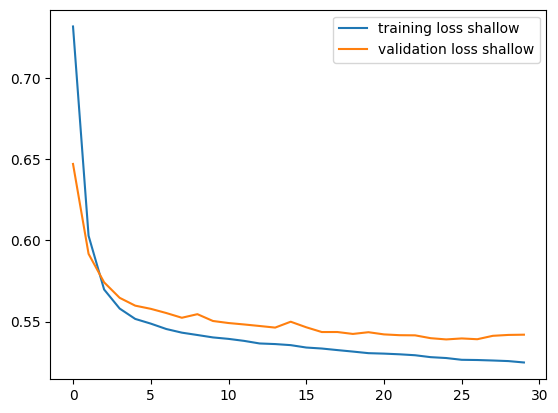

In [286]:
plt.plot(history_s.history["loss"], label="training loss shallow")
plt.plot(history_s.history["val_loss"], label="validation loss shallow")
plt.legend()
plt.show()

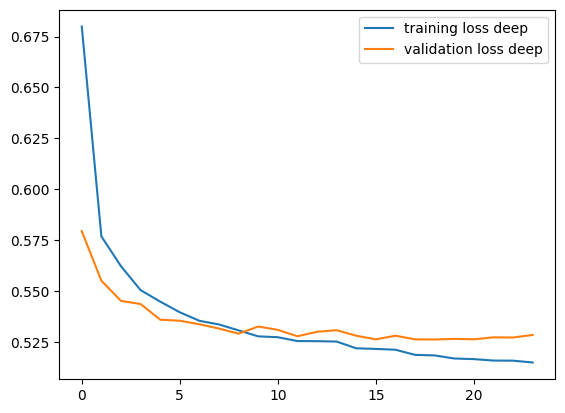

In [287]:
plt.plot(history_d.history["loss"], label="training loss deep")
plt.plot(history_d.history["val_loss"], label="validation loss deep")
plt.legend()
plt.show()

In [288]:
from keras.models import load_model

In [289]:
model_shallow = load_model("model_shallow.h5")
model_deep = load_model("model_deep.h5")
preprocessing_input = pickle.load(open("HIGGS_preprocessing.pickle", "rb"))

In [290]:
print('testing models using',x_test.shape[0],'events')

ntest_evts = x_test.shape[0]

testing models using 50000 events


In [291]:
Xt_test =preprocessing_input.transform(x_test)
Xt_train =preprocessing_input.transform(x_train)

In [292]:
print('testing models using',x_test.shape[0],'events')

ntest_evts = x_test.shape[0]
#in case we want to use a smaller set of test data
#num_events = 200000
predictions_shallow = model_shallow.predict(
        Xt_test)
predictions_deep = model_deep.predict(
        Xt_test)

testing models using 50000 events
1563/1563 [==============================] - 2s 2ms/step


In [293]:
predictions_shallow

array([[0.8207417 ],
       [0.00122291],
       [0.228355  ],
       ...,
       [0.91786987],
       [0.97794116],
       [0.03605475]], dtype=float32)

In [294]:
predictions_deep

array([[0.75558585],
       [0.00337143],
       [0.26693922],
       ...,
       [0.89478374],
       [0.9849841 ],
       [0.01530046]], dtype=float32)

In [295]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [296]:
fpr_shallow, tpr_shallow, _ = roc_curve(y_test, predictions_shallow, sample_weight=w_test)
fpr_deep, tpr_deep, _ = roc_curve(y_test, predictions_deep, sample_weight=w_test)


In [297]:
auc_shallow = auc(fpr_shallow, tpr_shallow)
auc_deep = auc(fpr_deep, tpr_deep)

print("AUC  deep model   = ",auc_deep)

print("AUC  shallow model   = ",auc_shallow)

AUC  deep model   =  0.9350818286555085
AUC  shallow model   =  0.9323289135438665


(0.0, 1.0)

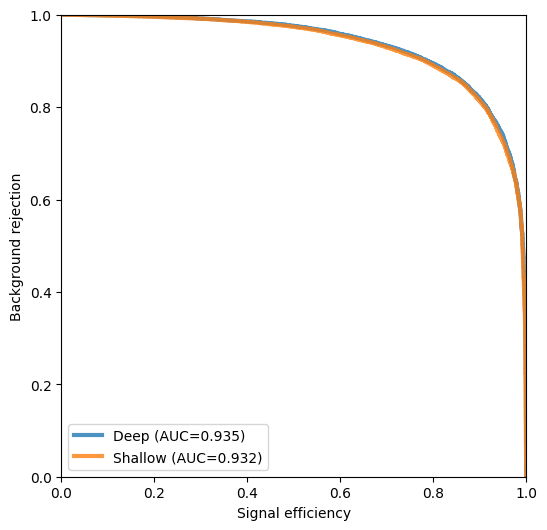

In [298]:
plt.figure(figsize=(6,6))
plt.plot(tpr_deep, 1.0-fpr_deep, lw=3, alpha=0.8,
        label="Deep (AUC={:.3f})".format(auc_deep))
plt.plot(tpr_shallow, 1.0-fpr_shallow, lw=3, alpha=0.8,
        label="Shallow (AUC={:.3f})".format(auc_shallow))
plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.legend(loc=3)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
#plt.savefig("HIGGS_roc.png", bbox_inches="tight")

In [299]:

predictions_shallow_tr = model_shallow.predict((Xt_train))
predictions_deeptr = model_deep.predict((Xt_train))

6250/6250 [==============================] - 10s 2ms/step


In [300]:
fpr_shallow_tr, tpr_shallow_tr, _ = roc_curve(y_train, predictions_shallow_tr, sample_weight=w_train)
fpr_deep_tr, tpr_deep_tr, _ = roc_curve(y_train, predictions_deeptr, sample_weight=w_train)

In [301]:

fpr_shallow, tpr_shallow, _ = roc_curve(y_test, predictions_shallow, sample_weight=w_test)
fpr_deep_tr, tpr_deep_tr, _ = roc_curve(y_train, predictions_deeptr, sample_weight=w_train)

In [302]:
auc_deep_tr = auc(fpr_deep_tr, tpr_deep_tr)
auc_shallow_tr = auc(fpr_shallow_tr, tpr_shallow_tr)

print("AUC shallow model training = ",auc_shallow_tr)
print("AUC  deep model training  = ",auc_deep_tr)

AUC shallow model training =  0.9319230937999873
AUC  deep model training  =  0.9365791546342714


In [303]:
bkg_score = model_deep.predict(Xt_train[y_train<0.5])[:,0]

4108/4108 [==============================] - 7s 2ms/step


In [304]:

sig_score = model_deep.predict(Xt_train[y_train>0.5])[:,0]

2143/2143 [==============================] - 3s 2ms/step


In [306]:
def compare_train_test(clf, x_train, y_train, x_test, y_test, w_train, w_test, bins=40):
    decisions = []
    wts = []
    for X,y,w in ((Xt_train, y_train, w_train),(Xt_test, y_test, w_test)):

        d1 = clf.predict(X[y>=0.5]).ravel()
        d2 = clf.predict(X[y<0.5]).ravel()
        w1 = w[y>=0.5]
        w2 = w[y<0.5]
        decisions += [d1, d2]
        wts += [w1, w2]
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.hist(decisions[0], weights= wts[0],
             color='r', alpha=0.7, range=(0,1), bins=bins,
             histtype='step', density=True,
             label='S (train)')
    plt.hist(decisions[1], weights=wts[1],
             color='b', alpha=0.7, range=low_high, bins=bins,
             histtype='step', density=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2], weights=wts[2],
                              bins=bins, range=(0,1), density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='none', c='r', label='S (test)')

    hist, bins = np.histogram(decisions[3], weights=wts[3],
                              bins=bins, range=low_high, density=1)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='none', c='b', label='B (test)')

    plt.xlabel("DNN output")
    plt.ylabel("Normalized units")
    plt.legend(loc='best')
    plt.savefig("DNNoutput.png", bbox_inches="tight")
    #print(decisions)
    #print(wts)

1028/1028 [==============================] - 2s 2ms/step


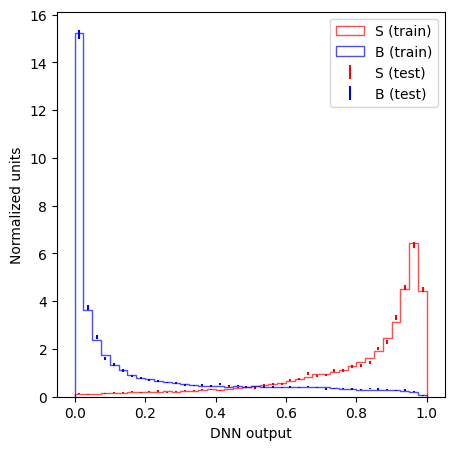

In [307]:
compare_train_test(model_deep,x_train,y_train,x_test,y_test, w_train, w_test)

In [ ]:

compare_train_test(model_shallow,x_train,y_train,x_test,y_test, w_train, w_test)

3089/4108 [=====================>........] - ETA: 1s

### Exercize: Try to improve this dnn model by including more features,removing dropout, trying different hyper-parameters